In [3]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing CSV files


# df_adjust_Limits = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/1%20Preprocess/Continuous%20Data/contData_all.csv')

# df_adjustments = pd.read_csv('https://raw.githubusercontent.com/saust1/Project-OptiC4/main/CSV/PVs/adjust_limits.csv')


df_adjust_Limits = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\PVs\adjust_limits.csv")


In [5]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 18


In [6]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425_pct_Al,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,HydWtr_Na2O,DI55102,DI55152,FC55003,FC55552,FC55569,FC55576,FFC55555,LC55557,LC90366,LC90368,TC55552
count,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000,97767.000000
mean,2.375719,1.556590,20.613789,170.175619,0.967199,0.959746,0.925446,0.945162,4535.149613,26636.434000,5160.511621,295.740116,1.845404,55.082645,46.807975,40.364888,140.448475
std,156.530915,3.700163,4.354269,804.131895,0.218351,3.649394,0.075834,0.058403,2661.043047,15866.678532,2676.455851,288.022227,27.625992,28.608611,26.236727,21.443954,59.810053
min,-9986.000000,0.001000,0.057000,0.000000,0.021000,-0.256120,0.000000,0.000000,-24.455300,-12997.800000,0.000000,-9.608200,0.000000,-0.627794,0.000000,0.000000,0.000000
25%,5.973400,0.681226,17.985850,4.065555,0.861583,0.389460,0.882456,0.916241,3318.110000,17732.000000,5710.320000,0.000000,0.720449,64.209750,26.871600,23.017150,141.871500
50%,6.120000,1.264480,20.057300,7.800000,0.935140,0.616626,0.938131,0.943505,5571.810000,35766.300000,6437.650000,274.183000,0.767982,69.283900,49.673100,46.228500,164.345000
75%,6.268150,1.671855,22.789000,34.022900,1.034185,1.002010,0.983182,0.981383,6310.400000,38112.200000,6737.925000,460.854500,0.786421,71.385900,67.386300,56.282600,178.306000
max,8.058320,90.136000,95.818000,36301.200000,10.726700,279.492000,1.212410,1.317230,20772.500000,52000.000000,12933.400000,1537.300000,1224.330000,100.000000,87.901600,83.400400,213.521000


In [7]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425_pct_Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368,AYC55580,DI52018,DI55102,DI55152,DI55580,TI52014,VI52558B
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0,0,0.5,0.8,0.75,0,0,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200,20,0.5,1.2,1.30,100,200,11


In [8]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


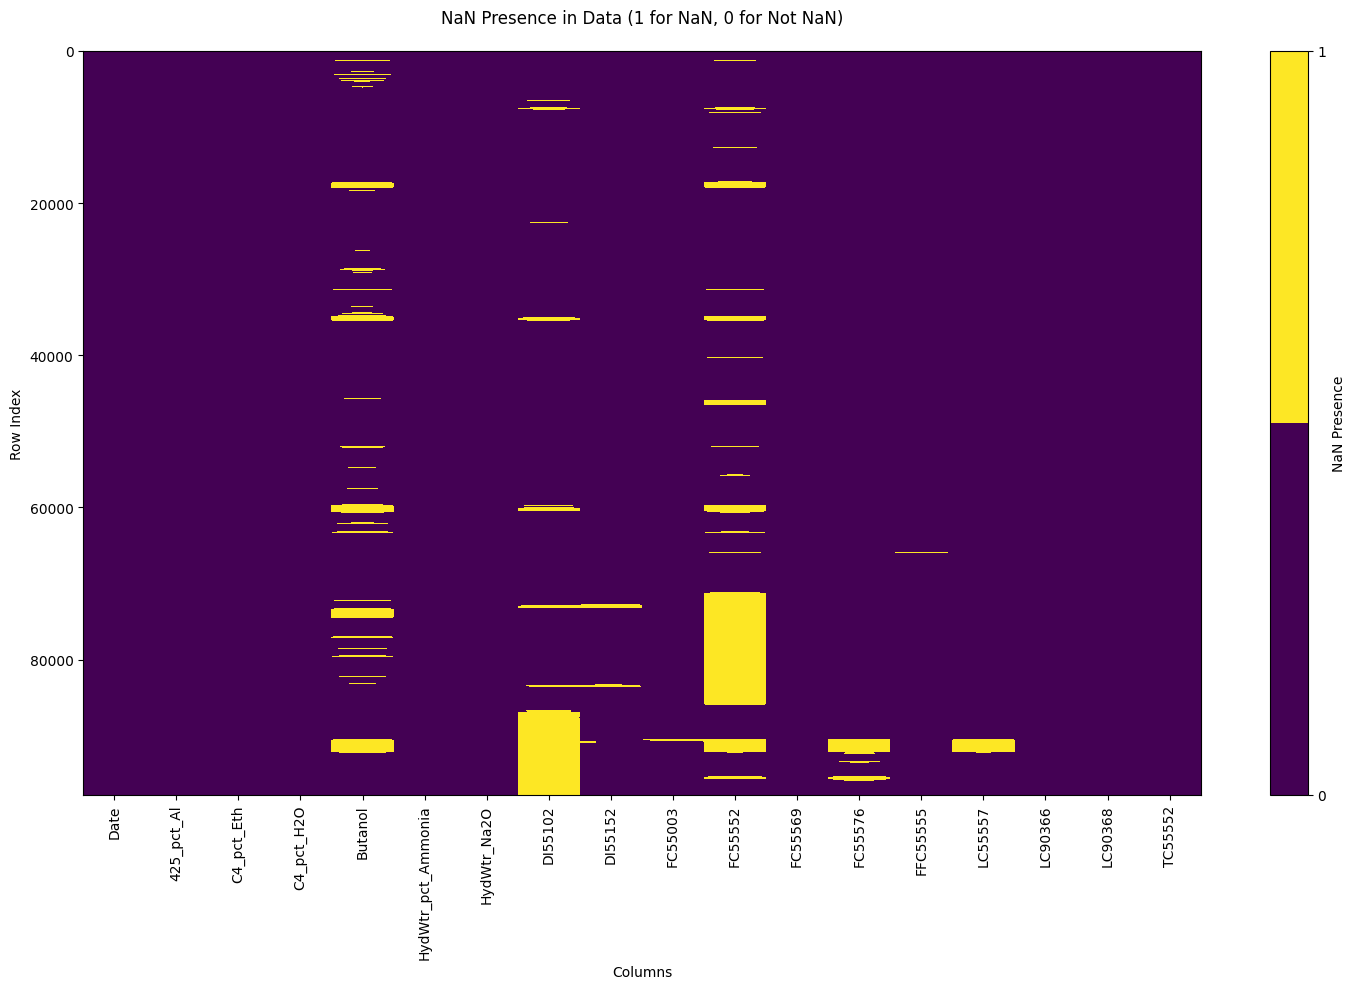

In [9]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [10]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       97767          97767          0        0.000000
1           425_pct_Al       97767          97697         70        0.071599
2           C4_pct_Eth       97767          97767          0        0.000000
3           C4_pct_H2O       97767          97767          0        0.000000
4              Butanol       97767          82170      15597       15.953236
5   HydWtr_pct_Ammonia       97767          97767          0        0.000000
6          HydWtr_Na2O       97767          97767          0        0.000000
7              DI55102       97767          83874      13893       14.210316
8              DI55152       97767          96480       1287        1.316395
9              FC55003       97767          97520        247        0.252641
10             FC55552       97767          74039      23728       24.269948
11             FC55569       97767          97763          4        0.004091

In [11]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date       58749          58749          0             0.0
1           425_pct_Al       58749          58749          0             0.0
2           C4_pct_Eth       58749          58749          0             0.0
3           C4_pct_H2O       58749          58749          0             0.0
4              Butanol       58749          58749          0             0.0
5   HydWtr_pct_Ammonia       58749          58749          0             0.0
6          HydWtr_Na2O       58749          58749          0             0.0
7              DI55102       58749          58749          0             0.0
8              DI55152       58749          58749          0             0.0
9              FC55003       58749          58749          0             0.0
10             FC55552       58749          58749          0             0.0
11             FC55569       58749          58749          0             0.0

In [12]:
# 59840 Records with all features included for preprocessing

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_adjust_Limits.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\adjusted_Limits.csv', index=False)

#bordeCode
df_adjust_Limits.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv', index=False)

In [13]:
df_adjust_Limits.describe()



,425_pct_Al,C4_pct_Eth,C4_pct_H2O,Butanol,HydWtr_pct_Ammonia,HydWtr_Na2O,DI55102,DI55152,FC55003,FC55552,FC55569,FC55576,FFC55555,LC55557,LC90366,LC90368,TC55552
count,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,5.874900e+04,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000,58749.000000
mean,6.156007,1.482584,21.425175,11.962564,0.988184,0.942882,0.943126,0.933108,5.998449e+03,35312.569259,6624.872902,371.426412,0.771099,69.522364,45.628719,36.522146,168.174319
std,0.327066,3.562871,4.507699,15.608899,0.214473,4.011604,0.054624,0.032043,1.058254e+03,5772.188678,496.756716,254.032390,0.028924,3.155705,28.888482,20.326790,16.127633
min,0.155707,0.001000,0.057000,0.000000,0.070270,0.000000,0.800002,0.809662,1.930000e-17,7377.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006367,98.687500
25%,6.009710,0.634452,18.838000,3.842080,0.875294,0.458320,0.908179,0.912638,5.450220e+03,33749.800000,6346.930000,197.761000,0.757565,67.030300,20.164500,19.641900,155.242000
50%,6.150930,1.142670,21.444600,6.050000,0.943749,0.673663,0.948168,0.933281,6.007390e+03,37915.700000,6580.400000,344.749000,0.771551,70.119300,46.435200,41.280200,172.427000
75%,6.312280,1.720800,23.344800,12.190000,1.046050,0.995499,0.984087,0.953225,6.577880e+03,39006.200000,6837.160000,546.466000,0.787966,71.861100,76.866500,52.052500,180.694000
max,8.058320,77.165000,95.818000,99.950000,3.744840,279.492000,1.120200,1.039590,1.470590e+04,52000.000000,10503.000000,1461.990000,0.998409,100.000000,87.901600,81.210800,203.179000


In [14]:
# 59840 Records with all features included for preprocessing

In [15]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-03-21 20:47:41.211331
